In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

In [2]:
def read_GA_file(input_file_path:str) -> Tuple[List[float],List[float]]:
    """Read the values produced by a genetic algorithm, as found in file given in :param input_file_path:
    :param input_file_path: the input file path, containing output produced by a GA algorithm. 
    :return: a touple two lists. The first list contains the average value of each generation.The second list contains 
    the max value of each generation. Both lists has same length NR."""
    with open(input_file_path, 'rt') as f:
        lines = f.readlines()
    lines = [line for line in lines if len(line.strip()) > 0] # remove empty entries
    lines_start_generation = [i for i, line in enumerate(lines) if line.startswith('#inceput date generatie')]
    lines_end_generation = [i for i, line in enumerate(lines) if line.startswith('#sfarsit date generatie')]
    
    # check for paired start-end notifications
    assert len(lines_start_generation) == len(lines_end_generation) 
    # start block right after end of previous block
    assert np.all(np.array(lines_start_generation[1:]) - 1 == np.array(lines_end_generation[:-1])) 
    
    result_mean_generations = [] # a list of floating point values, with mean of each generation
    result_best_generations = [] # a list of floating point values, with max of each generation
    
    for start_index, end_index in zip(lines_start_generation, lines_end_generation):
        values_current_population = []
        for index_line in range(start_index+2, end_index, 2): # step 2 because we do not use the x and y values of the chromosome
            line = lines[index_line]
            assert line.startswith('valoare: ')
            value_chromosome = float(line.split(': ')[1])
            values_current_population.append(value_chromosome)
        result_mean_generations.append(np.mean(values_current_population))
        result_best_generations.append(np.max(values_current_population))
    
    return result_mean_generations, result_best_generations
    

In [3]:
def plot_GA(result_mean_generations:List[float], result_best_generations:List[float]) -> None:
    """Plots the evolutions of the genetic populations.
    :return: None"""
    generations = range(len(result_mean_generations))
    f, ax = plt.subplots(figsize=(20, 10))
    
    ax.plot(result_mean_generations, label='Generation mean')
    ax.plot(result_best_generations, 'g', label='Generation best')
    ax.set_xticks(generations)
    ax.set_xlabel('Generation number')
    ax.set_ylabel('Fitness value')
    ax.set_title('Population evolution')
    ax.legend(loc='best')

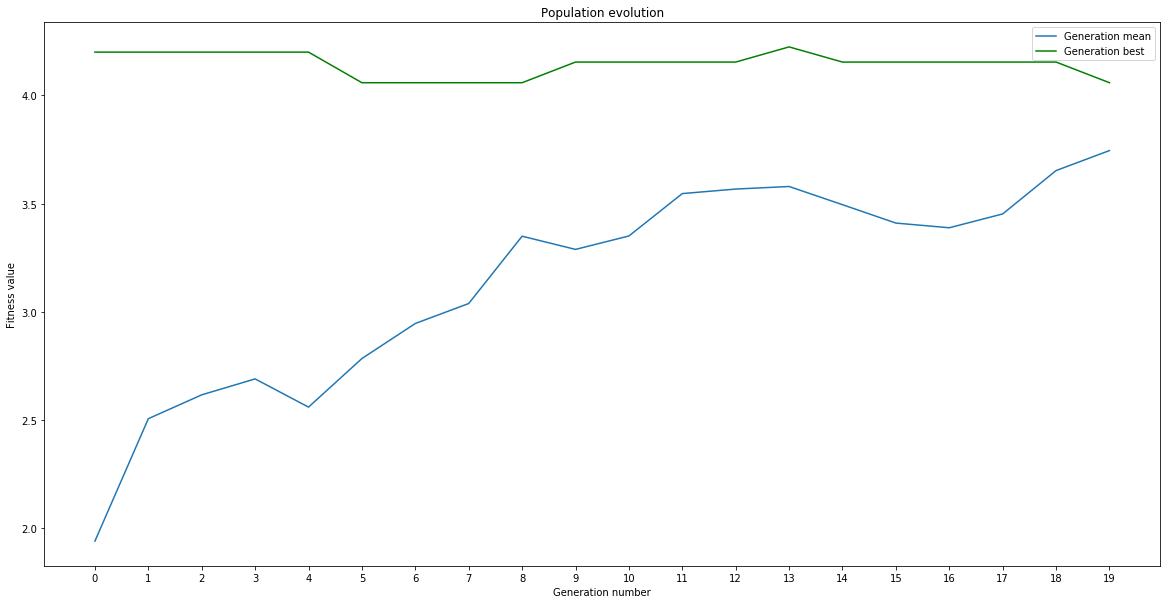

In [4]:
file_name = 'algoritmi_genetici.txt'
result_mean_generations, result_best_generations = read_GA_file(file_name)
plot_GA(result_mean_generations, result_best_generations)